In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv("USD_TRY Geçmiş Verileri.csv")
df=df[1:]

In [131]:
df.head()

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
1,01.10.2022,"18,5920","18,4895","18,7200","18,3515",NaN,"0,50%"
2,01.09.2022,"18,5000","18,1976","18,6262","18,0980",NaN,"1,72%"
3,01.08.2022,"18,1868","17,9084","18,3530","17,6443",NaN,"1,54%"
4,01.07.2022,"17,9114","16,6968","18,0470","16,5898",NaN,"7,30%"
5,01.06.2022,"16,6933","16,4054","17,4713","16,0021",NaN,"1,95%"


In [132]:
df.isnull().sum()


Tarih       0
Şimdi       0
Açılış      0
Yüksek      0
Düşük       0
Hac.      393
Fark %      0
dtype: int64

In [133]:
df.drop(['Hac.'], axis='columns', inplace=True)


In [134]:
df.head()

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Fark %
1,01.10.2022,"18,5920","18,4895","18,7200","18,3515","0,50%"
2,01.09.2022,"18,5000","18,1976","18,6262","18,0980","1,72%"
3,01.08.2022,"18,1868","17,9084","18,3530","17,6443","1,54%"
4,01.07.2022,"17,9114","16,6968","18,0470","16,5898","7,30%"
5,01.06.2022,"16,6933","16,4054","17,4713","16,0021","1,95%"


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 1 to 393
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tarih   393 non-null    object
 1   Şimdi   393 non-null    object
 2   Açılış  393 non-null    object
 3   Yüksek  393 non-null    object
 4   Düşük   393 non-null    object
 5   Fark %  393 non-null    object
dtypes: object(6)
memory usage: 18.6+ KB


In [136]:
df['Tarih'] = pd.to_datetime(df['Tarih'])

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 1 to 393
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Tarih   393 non-null    datetime64[ns]
 1   Şimdi   393 non-null    object        
 2   Açılış  393 non-null    object        
 3   Yüksek  393 non-null    object        
 4   Düşük   393 non-null    object        
 5   Fark %  393 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 18.6+ KB


In [138]:
df = df.sort_values(by=['Tarih'])

In [139]:
df = df.set_index(['Tarih'])

In [140]:
df.head()

,Şimdi,Açılış,Yüksek,Düşük,Fark %
Tarih,,,,,
1990-01-02,"0,0024","0,0024","0,0024","0,0024","4,35%"
1990-01-03,"0,0025","0,0025","0,0025","0,0025","4,17%"
1990-01-04,"0,0025","0,0025","0,0025","0,0025","0,00%"
1990-01-05,"0,0026","0,0026","0,0026","0,0026","4,00%"
1990-01-06,"0,0027","0,0027","0,0027","0,0025","3,85%"


In [141]:
df.rename(columns = {'Fark %':'Fark'}, inplace = True)

In [142]:
df.Fark=df.Fark.str.replace("%","")
df.Fark=df.Fark.str.replace(",",".")

In [143]:
df.Fark = pd.to_numeric(df.Fark)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 393 entries, 1990-01-02 to 2022-01-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Şimdi   393 non-null    object 
 1   Açılış  393 non-null    object 
 2   Yüksek  393 non-null    object 
 3   Düşük   393 non-null    object 
 4   Fark    393 non-null    float64
dtypes: float64(1), object(4)
memory usage: 18.4+ KB


In [145]:
df.head()

,Şimdi,Açılış,Yüksek,Düşük,Fark
Tarih,,,,,
1990-01-02,"0,0024","0,0024","0,0024","0,0024",4.35
1990-01-03,"0,0025","0,0025","0,0025","0,0025",4.17
1990-01-04,"0,0025","0,0025","0,0025","0,0025",0.00
1990-01-05,"0,0026","0,0026","0,0026","0,0026",4.00
1990-01-06,"0,0027","0,0027","0,0027","0,0025",3.85


In [146]:
df['Değişim Yönü'] = np.where(df['Fark'] >= 0 , 1, 0)

In [147]:
df.head(16)

,Şimdi,Açılış,Yüksek,Düşük,Fark,Değişim Yönü
Tarih,,,,,,
1990-01-02,"0,0024","0,0024","0,0024","0,0024",4.35,1
1990-01-03,"0,0025","0,0025","0,0025","0,0025",4.17,1
1990-01-04,"0,0025","0,0025","0,0025","0,0025",0.00,1
1990-01-05,"0,0026","0,0026","0,0026","0,0026",4.00,1
1990-01-06,"0,0027","0,0027","0,0027","0,0025",3.85,1
1990-01-07,"0,0027","0,0027","0,0030","0,0026",0.00,1
1990-01-08,"0,0027","0,0027","0,0030","0,0025",0.00,1
1990-01-09,"0,0027","0,0027","0,0028","0,0025",0.00,1
1990-01-10,"0,0028","0,0028","0,0028","0,0027",3.70,1


In [148]:
df.tail()

,Şimdi,Açılış,Yüksek,Düşük,Fark,Değişim Yönü
Tarih,,,,,,
2022-01-06,"16,6933","16,4054","17,4713","16,0021",1.95,1
2022-01-07,"17,9114","16,6968","18,0470","16,5898",7.30,1
2022-01-08,"18,1868","17,9084","18,3530","17,6443",1.54,1
2022-01-09,"18,5000","18,1976","18,6262","18,0980",1.72,1
2022-01-10,"18,5920","18,4895","18,7200","18,3515",0.50,1


In [149]:
from itertools import groupby
list1 = df['Değişim Yönü']
count_dups = [sum(1 for _ in group) for _, group in groupby(list1)]
print(count_dups)

[15, 1, 35, 2, 77, 1, 10, 3, 1, 2, 3, 1, 2, 1, 1, 2, 1, 3, 1, 2, 1, 5, 2, 2, 2, 5, 2, 3, 4, 3, 1, 1, 2, 2, 1, 4, 1, 5, 1, 2, 1, 1, 3, 2, 1, 1, 4, 1, 2, 3, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 3, 3, 5, 1, 2, 2, 1, 1, 1, 2, 1, 5, 2, 1, 4, 2, 3, 4, 4, 2, 5, 1, 4, 2, 3, 2, 1, 1, 1, 1, 5, 7, 3, 2, 7, 3, 1, 1, 3, 3, 1, 1, 7, 1, 5, 3, 5, 2, 3, 2, 9]


In [150]:
df.iloc[[15]]

,Şimdi,Açılış,Yüksek,Düşük,Fark,Değişim Yönü
Tarih,,,,,,
1991-01-05,"0,0040","0,0040","0,0044","0,0040",-2.44,0


In [151]:
df.iloc[[15+1+35]]

,Şimdi,Açılış,Yüksek,Düşük,Fark,Değişim Yönü
Tarih,,,,,,
1994-01-05,"0,0314","0,0352","0,0367","0,0309",-10.03,0


In [152]:
df.iloc[[15+1+35+2+77]]

,Şimdi,Açılış,Yüksek,Düşük,Fark,Değişim Yönü
Tarih,,,,,,
2000-01-12,"0,6703","0,6817","0,6845","0,6679",-1.82,0


In [153]:
df.iloc[[15+1+35+2+77+1+10]]

,Şimdi,Açılış,Yüksek,Düşük,Fark,Değişim Yönü
Tarih,,,,,,
2001-01-11,"1,4790","1,5950","1,6400","1,3940",-7.42,0


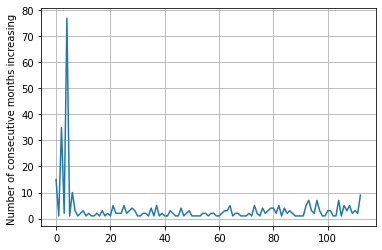

In [167]:
# naming the x and y axis
plt.ylabel('Number of consecutive months increasing ')
  
# plotting a line plot with it's default size

plt.plot(count_dups)
plt.grid()
plt.show()